# HW3

## Exercise 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from numba import jit

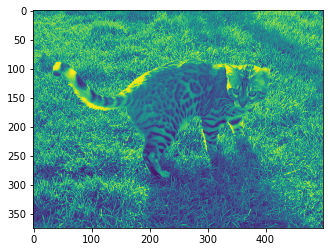

In [2]:
train_cat = np.matrix(np.loadtxt('train_cat.txt', delimiter = ','))
train_grass = np.matrix(np.loadtxt('train_grass.txt', delimiter = ','))
Y = plt.imread('cat_grass.jpg') / 255
plt.imshow(Y)

In [3]:
#2-b
K1 = train_cat.shape[1]
K0 = train_grass.shape[1]
mu_cat1 = np.mean(train_cat,axis=1)
mu_grass0 = np.mean(train_grass,axis=1)
Sigma_cat1=np.cov(train_cat)
Sigma_grass0=np.cov(train_grass)
pi_1=K1/(K1+K0)
pi_0=K0/(K1+K0)
print("mu_0: {}".format(mu_grass0[0:2]))
print("mu_1: {}".format(mu_cat1[0:2]))
print("Sigma_0: {}".format(Sigma_grass0[0:2,0:2]))
print("Sigma_1: {}".format(Sigma_cat1[0:2,0:2]))
print("pi_0 {}".format(pi_0))
print("pi_1 {}".format(pi_1))

mu_0: [[0.48249575]
 [0.4864399 ]]
mu_1: [[0.44080734]
 [0.43871359]]
Sigma_0: [[0.064484   0.0369168 ]
 [0.0369168  0.06623457]]
Sigma_1: [[0.04307832 0.03535405]
 [0.03535405 0.0424875 ]]
pi_0 0.828650711064863
pi_1 0.171349288935137


In [5]:
#2-c
row,col = Y.shape
Output = np.matrix(np.zeros((row-8,col-8)))
cat1_inv=np.linalg.inv(Sigma_cat1)
grass0_inv=np.linalg.inv(Sigma_grass0)

for i in range(row-8):
    for j in range(col-8):
        patch =np.matrix(np.reshape(Y[i:i+8, j:j+8],-1)).T
        cat = (-1/2)*(patch-mu_cat1).T@cat1_inv@(patch-mu_cat1)+np.log(pi_1)-(1/2)*np.log(np.linalg.det(Sigma_cat1)) 
        grass = (-1/2)*(patch-mu_grass0).T@grass0_inv@(patch-mu_grass0)+np.log(pi_0)-(1/2)*np.log(np.linalg.det(Sigma_grass0)) 
        #print(cat)
        #print(grass)
        if(cat>grass):
            Output[i,j]=1

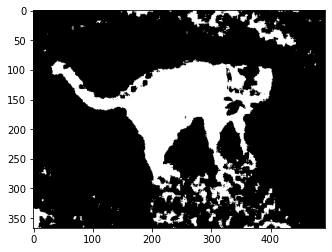

In [6]:
plt.imshow(Output*255,cmap='gray')

In [7]:
#2-d
M,N=Output.shape
ground_truth = plt.imread('truth.png')[0:M,0:N]
MAE=(1/(M*N))*np.sum(np.absolute(np.subtract(Output,ground_truth)))
print("MAE: {}".format(MAE))

MAE: 0.09109491785400917


In [8]:
#2-e
my_dog = plt.imread('dog.png') / 255
print(my_dog.shape)
row,col = my_dog.shape
Output_mydog = np.matrix(np.zeros((row-8,col-8)))

for i in range(row-8):
    for j in range(col-8):
        patch =np.matrix(np.reshape(my_dog[i:i+8, j:j+8],-1)).T
        cat = (-1/2)*(patch-mu_cat1).T@np.linalg.inv(Sigma_cat1)@(patch-mu_cat1)+np.log(pi_1)-(1/2)*np.log(np.linalg.det(Sigma_cat1)) 
        grass = (-1/2)*(patch-mu_grass0).T@np.linalg.inv(Sigma_grass0)@(patch-mu_grass0)+np.log(pi_0)-(1/2)*np.log(np.linalg.det(Sigma_grass0)) 
        if(cat>grass):
            Output_mydog[i,j]=1

(358, 672)


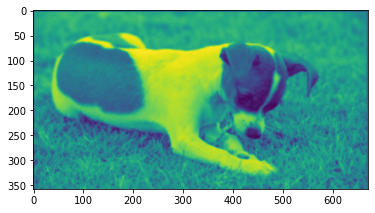

In [9]:
plt.imshow(my_dog)

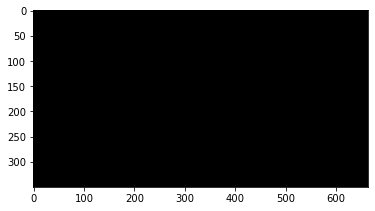

In [10]:
plt.imshow(Output_mydog*255,cmap='gray')

In [11]:
my_cat = cv2.imread('mycat.jpeg',0) / 255
print(my_cat.shape)
row,col = my_cat.shape
Output_mycat = np.matrix(np.zeros((row-8,col-8)))

for i in range(row-8):
    for j in range(col-8):
        patch =np.matrix(np.reshape(my_cat[i:i+8, j:j+8],-1)).T
        cat = (-1/2)*(patch-mu_cat1).T@np.linalg.inv(Sigma_cat1)@(patch-mu_cat1)+np.log(pi_1)-(1/2)*np.log(np.linalg.det(Sigma_cat1)) 
        grass = (-1/2)*(patch-mu_grass0).T@np.linalg.inv(Sigma_grass0)@(patch-mu_grass0)+np.log(pi_0)-(1/2)*np.log(np.linalg.det(Sigma_grass0)) 
        if(cat>grass):
            Output_mycat[i,j]=1

(455, 700)


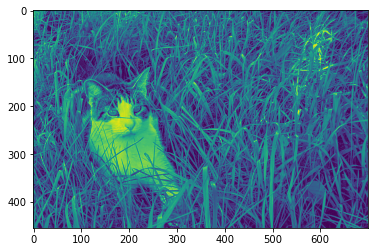

In [12]:
plt.imshow(my_cat)

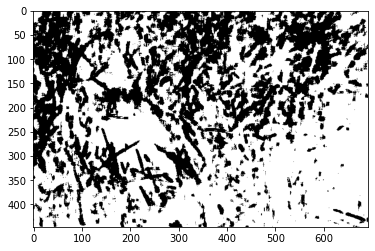

In [13]:
plt.imshow(Output_mycat*255,cmap='gray')

I choosed a dog on grass picture and another cat on grass picture. Converted both of them into grayscale. However, seems like that the classifier does not work on the dog on grass picutre at all and it classify everything as grass. For the other cat on grass picture, seems like it doesn't work well, the classified image doesn't represent the original image. What might caused this are:

    - The classifier we trained previously are for cat, it can't classify dogs
    - The training data we have for cat and grass are specfic for a certain set of images, it doesn't work on this specfic picure

## Exercise 3 

In [14]:
#3-a
#we will still use the same cat grass picture from exercise 2
Y = plt.imread('cat_grass.jpg') / 255
tau_original = pi_0/pi_1
print("tau for exercise 2: {}".format(tau_original))

tau for exercise 2: 4.836032388663967


In [16]:
#3-b
row,col = Y.shape
ground_truth = plt.imread('truth.png')[0:row-8,0:col-8]
pos_count = np.count_nonzero(ground_truth)
neg_count =(row-8)*(col-8)-pos_count
ratio_saver = np.matrix(np.zeros((row-8,col-8)))
cat1_inver=np.linalg.inv(Sigma_cat1)
grass0_inver=np.linalg.inv(Sigma_grass0)
pd=[]
pf=[]

for i in range(row-8):
    for j in range(col-8):
        patch = np.matrix(np.reshape(Y[i:i+8, j:j+8],-1)).T
        ratio = ((np.linalg.det(Sigma_grass0)**(1/2))/(np.linalg.det(Sigma_cat1)**(1/2)))*np.exp((-1/2)*(patch-mu_cat1).T@cat1_inver@(patch-mu_cat1)+(1/2)*(patch-mu_grass0).T@grass0_inver@(patch-mu_grass0))
        ratio_saver[i,j]=ratio
        
for power in range(-250,250): 
    tau = 2**(power)
    prediction=np.matrix(np.zeros((row-8,col-8)))
    prediction[ratio_saver >= tau] = 1
    tp=np.sum(np.logical_and(prediction, ground_truth))
    fp=np.sum(np.logical_and(np.logical_xor(prediction, ground_truth),np.logical_not(ground_truth)))
    pd.append(tp/pos_count)
    pf.append(fp/neg_count)

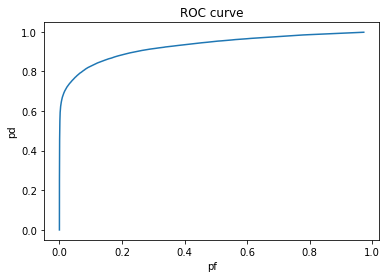

In [17]:
#pd = np.array(pos)/pos_count
#pf = np.array(neg)/neg_count
plt.title("ROC curve")
plt.xlabel("pf")
plt.ylabel("pd")
plt.plot(pf,pd)

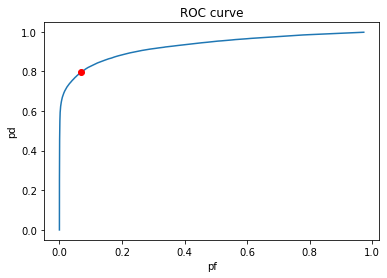

In [18]:
#3-c
tau_ex2 = pi_0/pi_1
power = np.log(tau_ex2)/np.log(2)
plt.title("ROC curve")
plt.xlabel("pf")
plt.ylabel("pd")
plt.plot(pf,pd)
plt.plot(pf[250+int(power)],pd[250+int(power)],"ro")

In [19]:
#3-d
Y = plt.imread('cat_grass.jpg') / 255
A = np.vstack((train_cat.T,train_grass.T))
b = np.vstack((np.matrix(np.ones(train_cat.shape[1])).T, np.matrix(-1*np.ones(train_grass.shape[1])).T))
theta = np.linalg.inv(((A.T)@A))@(A.T)@b

row,col = Y.shape
ground_truth = plt.imread('truth.png')[0:row-8,0:col-8]
pos_count = np.count_nonzero(ground_truth)
neg_count =(row-8)*(col-8)-pos_count

pd=[]
pf=[]

for i in range(row-8):
    for j in range(col-8):
        patch = np.matrix(np.reshape(Y[i:i+8, j:j+8],-1)).T
        ratio = theta.T@patch
        ratio_saver[i,j]=ratio
        
for tau in np.linspace(-100,100,10000): 
    prediction=np.matrix(np.zeros((row-8,col-8)))
    prediction[ratio_saver >= tau] = 1
    tp=np.sum(np.logical_and(prediction, ground_truth))
    fp=np.sum(np.logical_and(np.logical_xor(prediction, ground_truth),np.logical_not(ground_truth)))
    pd.append(tp/pos_count)
    pf.append(fp/neg_count)

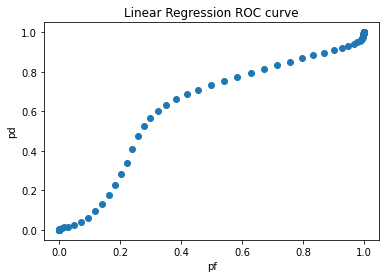

In [20]:
plt.title("Linear Regression ROC curve")
plt.xlabel("pf")
plt.ylabel("pd")
plt.scatter(pf,pd)